In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
#import argparse
import os
import tensorflow as tf 
from imutils import paths

In [2]:
from tensorflow.python.client import device_lib
gpu=tf.test.is_gpu_available()   
#gpu=tf.config.list_physical_devices('GPU')
print(gpu)
print(device_lib.list_local_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2498636958601088113
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11000905728
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14767193126338333724
physical_device_desc: "device: 0, name: GeForce RTX 3060, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]


In [10]:
# 초기 학습률, 훈련 할 Epoch 수 초기화, # 및 배치 크기
INIT_LR = 1e-4
EPOCHS = 20
BS = 81

In [4]:
# 데이터 셋 디렉토리에서 이미지 목록을 가져온 다음 초기화
# 데이터 (즉, 이미지) 및 클래스 이미지 목록
print("[INFO] loading images...")
imagePaths = list(paths.list_images("observations-master/experiements/data_chin"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2] #-2 폴더명을 가져오기 위하여
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
	print(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)
print("END")

[INFO] loading images...
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_

chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask


chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask


chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask


chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask


chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask
chin_mask


without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask

without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask

without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask

without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask

without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask

without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask
without_mask

with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask


with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask


with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask


with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask


with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask


In [5]:
# perform one-hot encoding on the labels
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)
labels = to_categorical(labels)
print(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

[0 0 0 ... 1 1 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [6]:
for i in labels:
    print(i)

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]

[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]

[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]

In [7]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

Physical devices cannot be modified after being initialized


In [ ]:
print(len(trainX) // BS)
print(len(testX) // BS)

In [11]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
129/129 [==============================] - 75s 544ms/step - loss: 0.0389 - accuracy: 0.9857 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 2/20
129/129 [==============================] - 59s 460ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0242 - val_accuracy: 0.9924
Epoch 3/20
129/129 [==============================] - 59s 461ms/step - loss: 0.0251 - accuracy: 0.9910 - val_loss: 0.0217 - val_accuracy: 0.9935
Epoch 4/20
129/129 [==============================] - 59s 460ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0242 - val_accuracy: 0.9931
Epoch 5/20
129/129 [==============================] - 59s 459ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0224 - val_accuracy: 0.9946
Epoch 6/20
129/129 [==============================] - 59s 460ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0231 - val_accuracy: 0.9943
Epoch 7/20
129/129 [==============================] - 59s 460ms/step - loss: 0.0

In [12]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
print(predIdxs)
predIdxs = np.argmax(predIdxs, axis=1)

[INFO] evaluating network...
[[2.0555999e-07 4.5015629e-08 9.9999976e-01]
 [9.9980110e-01 1.9836806e-04 6.2178060e-07]
 [9.9993920e-01 6.0397659e-05 3.6292252e-07]
 ...
 [1.0438480e-05 9.9998951e-01 3.1090764e-08]
 [3.5839854e-05 9.9996400e-01 7.8161072e-08]
 [9.6139175e-08 9.9999988e-01 1.0171239e-08]]


In [13]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save('chin_mask.h5',save_format="h5")

              precision    recall  f1-score   support

   chin_mask       0.99      1.00      0.99       872
   with_mask       1.00      0.99      1.00       872
without_mask       1.00      0.99      1.00       871

    accuracy                           1.00      2615
   macro avg       1.00      1.00      1.00      2615
weighted avg       1.00      1.00      1.00      2615

[INFO] saving mask detector model...


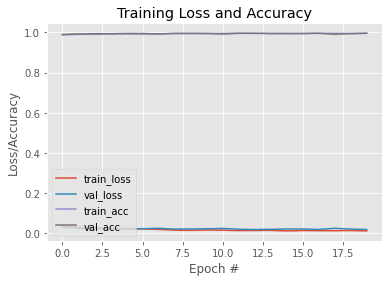

In [14]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('result.png')